In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 # OpenCV is used for manipulating images
            # for more info, visit https://opencv.org/

# Working with images

We will read an image using *cv2.imread*. 

**Color in images is constructed by mixing three primary colors: red, green and blue.**<br>
- Threfor, images usually are saced with 3 channels (red, green, blue).<br>
- For grayvalued images, all these channels are the same.

> For showing images, we will use *matplotlib* function *plt.imshow*
>
> Notice that we use different libraries for reading images (*cv2*) and for showing them inline (*matplotlib*). <br>
> OpenCV has a function for showing images as well, but it opens an image in a new window.

**The first issue when reading images we will notice is that image seems too blue.**
- The reason for this is that *OpenCV (cv2)*, aligns channels in BGR order, while *matplotlib* uses RGB images.
- For that reason, after reading images, fist thing we will do is use conversion from BGR to RGB.

original image shape = (1026, 1000, 3)


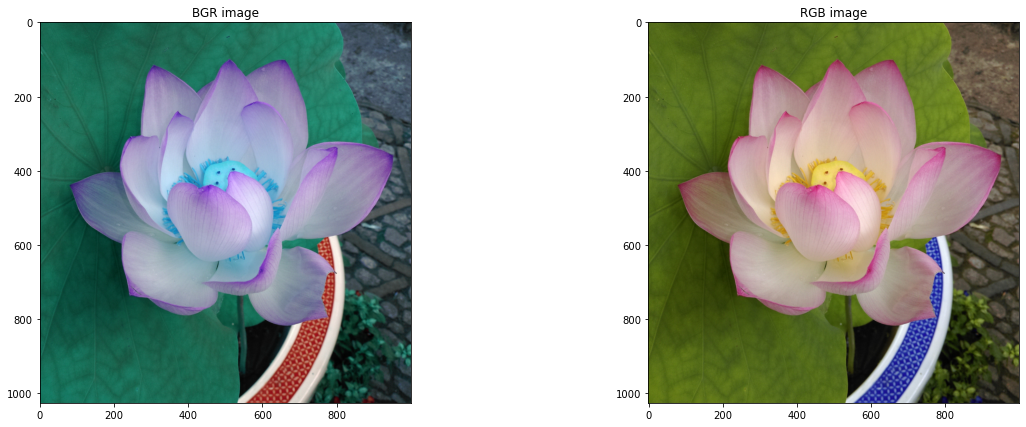

In [2]:
img_bgr = cv2.imread('flower_color.jpg')

plt.figure(figsize=(20,7))
plt.subplot(121)
plt.imshow(img_bgr)
plt.title('BGR image')

# Following lines of code show OpenCV display in a new window
# You can notice that the first BGR image is displayed correct even without conversion
# If you plan to use this display, please, uncomment all lines, otherwise Jupyter NOtebook will crash
#cv2.imshow('BGR image', img_bgr)
#cv2.waitKey(0) 
#cv2.destroyAllWindows() 

img_val = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB);
plt.subplot(122)
plt.imshow(img_val)
plt.title('RGB image')

print('original image shape = {}'.format(img_val.shape))

To understand how colors are being mixed, we will split the image in channels.

**Selecting each channel is like selecting a part of array, e.g. for the red channel:**
- we will select all columns of the image $img_{val}[:, \dots$
- we will select all rows of the image $img_{val}[:,:, \dots$
- and finally, the first channel of this RGB image $img_{val}[:,:,0]$

> **Homework:**<br>
> You will notice that some colors cause light areas for some channels, while they cause darker areas on other channels.<br>
> What does that mean and which colors are light for which channels?

Text(0.5, 1.0, 'Blue channel')

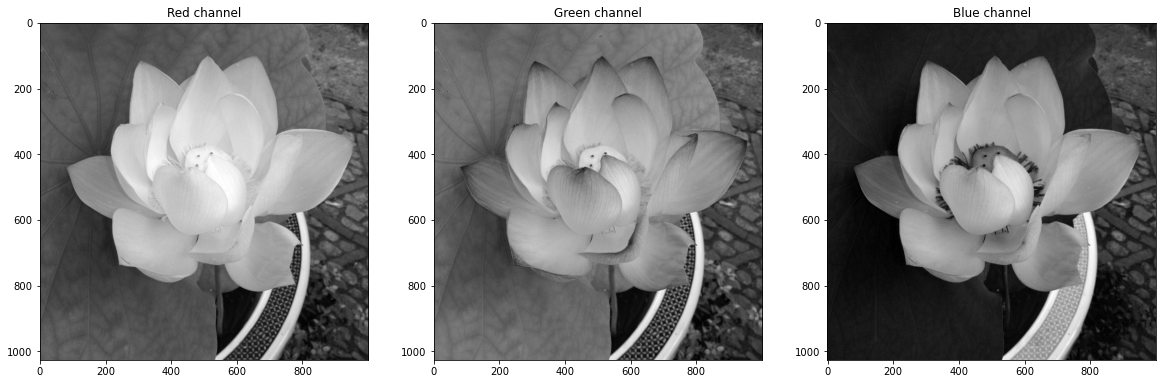

In [3]:
plt.figure(figsize=(20,7))

plt.subplot(131)
plt.imshow(img_val[:,:,0], cmap='gray')
plt.title('Red channel')

plt.subplot(132)
plt.imshow(img_val[:,:,1], cmap='gray')
plt.title('Green channel')

plt.subplot(133)
plt.imshow(img_val[:,:,2], cmap='gray')
plt.title('Blue channel')

## Converting to a grayscale image

To convert from a color image to a grayscale image, we will use the function *cv2.cvtColor* with the conversion argument *cv2.COLOR_RGB2GRAY*.<br>
The function creates an ordinary 2D array from a 3-channel image using the equation:<br>

$Y\leftarrow{0.299}\cdot{R}+0.587\cdot{G}+0.114\cdot{B}$<br>

Pixel values are then rounded to closest integers as images usually use *uint8* representation (values from $[0, 255]$).

https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html

> **Homework:**<br>
> Notice that channel values are not used equally during the conversion.
> Try to find out why is it so.

grayvalue image shape = (1026, 1000)


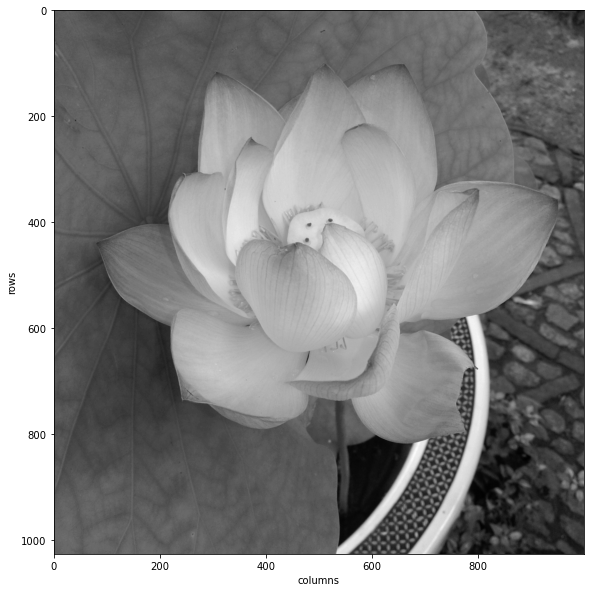

In [4]:
img_gray = cv2.cvtColor(img_val, cv2.COLOR_RGB2GRAY);

plt.figure(figsize=(10,10))
plt.imshow(img_gray, cmap='gray')
plt.xlabel('columns')
plt.ylabel('rows')

print('grayvalue image shape = {}'.format(img_gray.shape))

## Selecting a rectangle

Cropped image as matrix=
[[ 99  96  96 ... 103 101 101]
 [ 97  98 101 ... 102 101 100]
 [ 97 100 102 ... 102 101  99]
 ...
 [ 89  90  89 ...  82  81  83]
 [ 92  91  88 ...  81  82  82]
 [ 92  92  90 ...  80  80  83]]


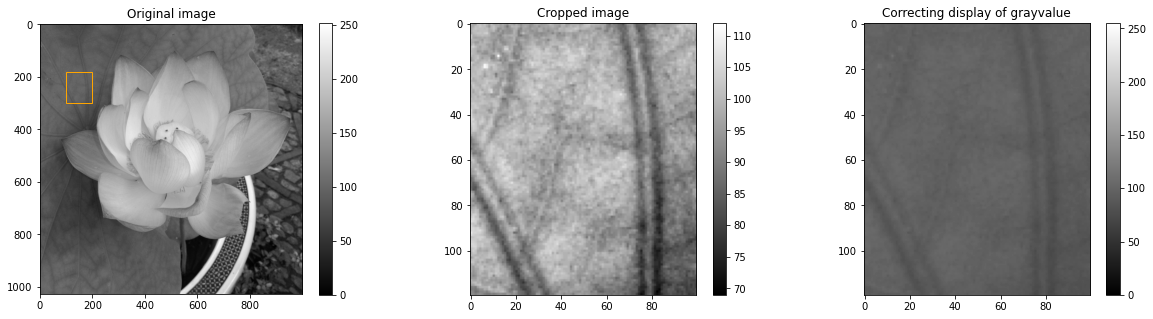

In [5]:
import matplotlib.patches as patches # this library to draw a rectangle

rect_tl = np.array([100, 180]) # top left corner x and y
rect_br = np.array([200, 300]) # bottm right corner x and y

#--------------------------------------------------------------------------
img_crop = img_gray[rect_tl[1]:rect_br[1],  # row selection - y values
                    rect_tl[0]:rect_br[0]]  # column selection - x values


# Display part
plt.figure(figsize=(20,5))

ax = plt.subplot(131)
p = plt.imshow(img_gray, cmap='gray')
plt.colorbar(p)
# Create a Rectangle patch
draw_rect = patches.Rectangle((rect_tl[0], rect_tl[1]), 
                              rect_br[0] - rect_tl[0],
                              rect_br[1] - rect_tl[1], 
                              linewidth=1, edgecolor='orange', facecolor='none')
ax.add_patch(draw_rect)
plt.title('Original image')

plt.subplot(132)
p = plt.imshow(img_crop, cmap='gray')
plt.colorbar(p)
plt.title('Cropped image')

plt.subplot(133)
p = plt.imshow(img_crop, cmap='gray', vmin=0, vmax=255)
plt.colorbar(p)
plt.title('Correcting display of grayvalue')

print('Cropped image as matrix=\n{}'.format(img_crop))

> **Homework**<br>
> You will notice that we had to correct the grayvalue display since the cropped image was too bright.<br>
> Why was it so?

## Sampling an image
To reduce image size, it is possible to sample every *n-th* pixel.

Text(0.5, 1.0, 'Sampled image - every 20th pixel')

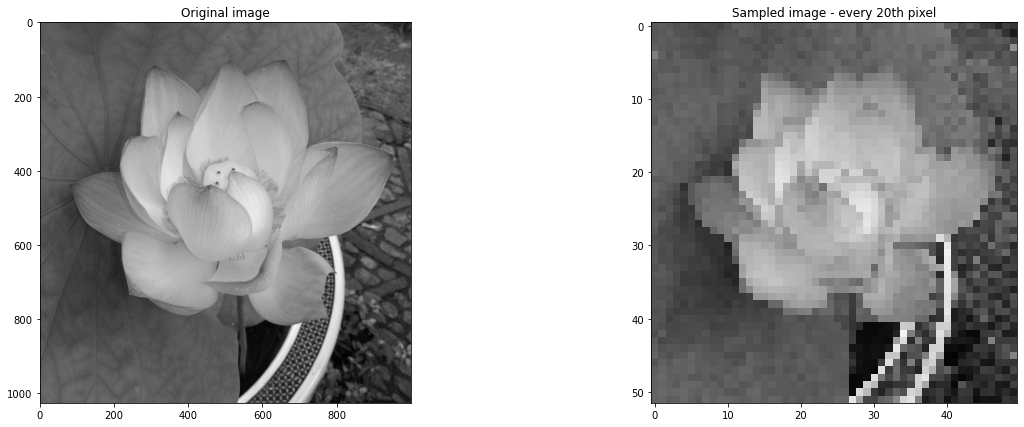

In [6]:
img_sampled = img_gray[::20,::20]

# Display part
plt.figure(figsize=(20,7))

plt.subplot(121)
p = plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)
plt.title('Original image')

plt.subplot(122)
p = plt.imshow(img_sampled, cmap='gray', vmin=0, vmax=255)
plt.title('Sampled image - every 20th pixel')

# On plots below, we are forcing the size of diplayed image (using figsize)
# To see that image has become smaller, read x and y axes, 
# or try the code below - uncomment the whole code:
#---------------------------------------------------------------------------
#cv2.imshow('Original image', img_gray)
#cv2.imshow('Sampled image', img_sampled)
#cv2.waitKey(0) 
#cv2.destroyAllWindows() 

## Homework: Drawing a horizontal line profile

> Explain what does the code below do.

Text(0.5, 1.0, 'Line profile')

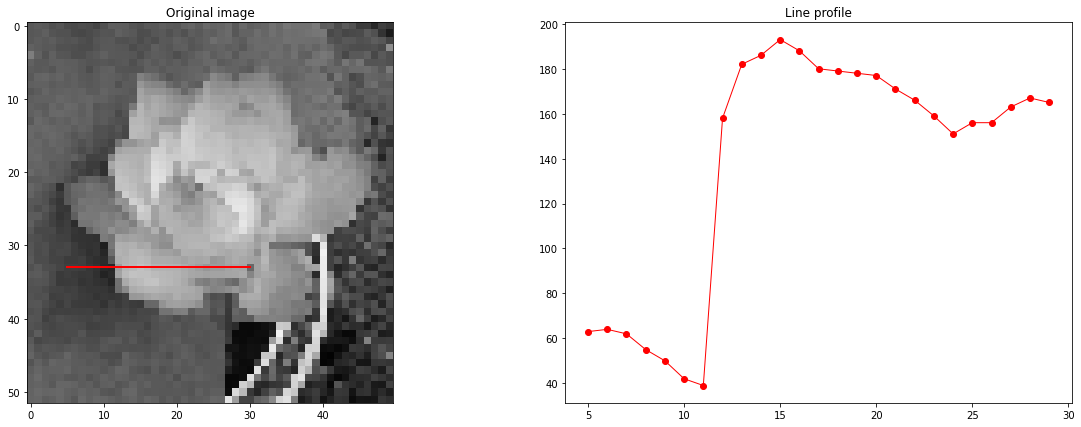

In [7]:
x_vals = [5, 30] # the begin point and the end point
y_val  = 33      # y position of the horizontal line

#----------------------------------------------------------
line_profile = img_sampled[y_val, x_vals[0]:x_vals[1]] # pay attention that first y range is given and then x range

# Display part
plt.figure(figsize=(20,7))

# original image
plt.subplot(121)
p = plt.imshow(img_sampled, cmap='gray', vmin=0, vmax=255)
plt.plot(x_vals, [y_val, y_val], linewidth=2, color='red') # drawing a line on the image
plt.title('Original image')

# line profile
plt.subplot(122)
x_axis_vals = np.arange(x_vals[0], x_vals[1],1) # this is to have a correct x position for the plot
plt.plot(x_axis_vals, line_profile, linewidth=1, color='red', marker='o')
plt.title('Line profile')